#**Analisis de DataSet de ventas Online**

**Limpieza de datos**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Cargar dataset

df = pd.read_csv('/content/Online_Retail.csv', encoding='latin1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [ ]:
print(df.shape)
print(df.dtypes)

(221247, 8)
InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object


In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,854
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,63163
Country,0


In [ ]:
df.duplicated().sum()

1849

In [ ]:
unique_values = {col: df[col].unique() for col in df.columns}

for col, values in unique_values.items():
    print(f"Valores únicos en la columna '{col}':")
    print(f'Numero de valores unicos: {len(values)}')
    print(f'valores unicos: {values[:10]}')
    print('-' * 50)

Valores únicos en la columna 'InvoiceNo':
Numero de valores unicos: 11415
valores unicos: ['536365' '536366' '536367' '536368' '536369' '536370' '536371' '536372'
 '536373' '536374']
--------------------------------------------------
Valores únicos en la columna 'StockCode':
Numero de valores unicos: 3564
valores unicos: ['85123A' '71053' '84406B' '84029G' '84029E' '22752' '21730' '22633'
 '22632' '84879']
--------------------------------------------------
Valores únicos en la columna 'Description':
Numero de valores unicos: 3521
valores unicos: ['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' 'KNITTED UNION FLAG HOT WATER BOTTLE'
 'RED WOOLLY HOTTIE WHITE HEART.' 'SET 7 BABUSHKA NESTING BOXES'
 'GLASS STAR FROSTED T-LIGHT HOLDER' 'HAND WARMER UNION JACK'
 'HAND WARMER RED POLKA DOT' 'ASSORTED COLOUR BIRD ORNAMENT']
--------------------------------------------------
Valores únicos en la columna 'Quantity':
Numero de valores unicos: 451
valor

In [ ]:
#Limpeza de datos

data_cleaned = df.drop_duplicates()
data_cleaned = data_cleaned.dropna(subset=['CustomerID'])

In [ ]:
data_cleaned.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [ ]:
data_cleaned.duplicated().sum()

0

**Creación de columnas**

In [ ]:
data_cleaned['Total_Amount'] = data_cleaned['Quantity'] * data_cleaned['UnitPrice']

data_cleaned['InvoiceDate'] = pd.to_datetime(data_cleaned['InvoiceDate'])
data_cleaned['Year'] = data_cleaned['InvoiceDate'].dt.year
data_cleaned['Month'] = data_cleaned['InvoiceDate'].dt.month
data_cleaned['Day'] = data_cleaned['InvoiceDate'].dt.day
print(data_cleaned.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  Total_Amount  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom         15.30   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom         20.34   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom         22.00   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom         20.34   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom         20.34   

   Year  Month  Day  
0  2010     12    1  
1  2010     12    1  
2  2010     12    1  
3  2010   

In [ ]:
sales_by_year = data_cleaned.groupby('Year')['Total_Amount'].sum()
print(sales_by_year)

Year
2010     552372.860
2011    2739207.251
Name: Total_Amount, dtype: float64


In [ ]:
data_cleaned['Semester'] = data_cleaned['Month'].apply(lambda x: 1 if x <= 6 else 2)

In [ ]:
sales_by_semester = data_cleaned.groupby(['Year', 'Semester'])['Total_Amount'].sum()
print(sales_by_semester)

Year  Semester
2010  2            552372.860
2011  1           2739207.251
Name: Total_Amount, dtype: float64


In [ ]:
#Ventas trimestrales

data_cleaned['Quarter'] = data_cleaned['Month'].apply(lambda x: (x - 1) // 3 + 1)
sales_by_quarter = data_cleaned.groupby(['Year', 'Quarter'])['Total_Amount'].sum()
print(sales_by_quarter)

Year  Quarter
2010  4           552372.860
2011  1          1487842.180
      2          1251365.071
Name: Total_Amount, dtype: float64


In [ ]:
# Ventas mensuales

sales_by_month = data_cleaned.groupby(['Year', 'Month'])['Total_Amount'].sum()
print(sales_by_month)

Year  Month
2010  12       552372.860
2011  1        473731.900
      2        435534.070
      3        578576.210
      4        425222.671
      5        647011.670
      6        179130.730
Name: Total_Amount, dtype: float64


**Visualización**

In [ ]:
total_returns = data_cleaned[data_cleaned['Quantity'] < 0].shape[0]
print(f"Total de devoluciones: {total_returns}")

Total de devoluciones: 3770


In [ ]:
total_no_returns = data_cleaned[data_cleaned['Quantity'] > 0].shape[0]
print(f"Total de ventas: {total_no_returns}")

Total de ventas: 152486


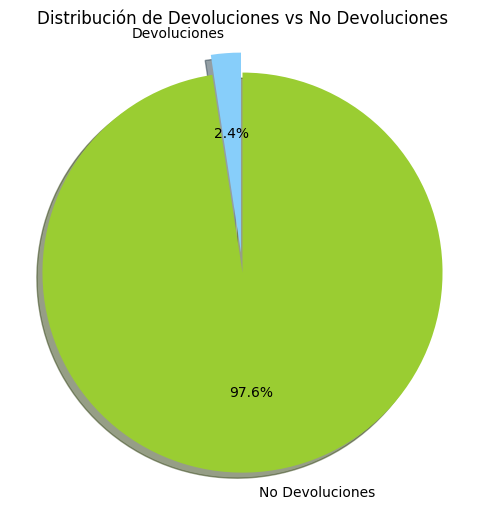

In [ ]:
# Grafico devoluciones vs no devoluciones

labels = ['Devoluciones', 'No Devoluciones']
sizes = [total_returns, total_no_returns]
colors = ['lightskyblue', 'yellowgreen']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, shadow=True, explode=(0.1, 0))
plt.axis('equal')
plt.title('Distribución de Devoluciones vs No Devoluciones')
plt.show()

In [ ]:
# Columna categorica para especificar el monto total de la transación

def categorize_transaction(total_amount):
    if total_amount < 20:
        return 'Low'
    elif total_amount >= 20 and total_amount < 100:
        return 'Medium'
    else:
        return 'High'

data_cleaned['Transaction_Category'] = data_cleaned['Total_Amount'].apply(categorize_transaction)

data_cleaned

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Amount,Year,Month,Day,Semester,Quarter,Transaction_Category
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,2,4,Low
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,2,4,Medium
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,1,2,4,Medium
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,2,4,Medium
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,2,4,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221181,556241,84687,BEACH HUT SHELF W 3 DRAWERS,2,2011-06-09 16:04:00,5.95,12597.0,Spain,11.90,2011,6,9,1,2,Low
221182,556241,22487,WHITE WOOD GARDEN PLANT LADDER,1,2011-06-09 16:04:00,9.95,12597.0,Spain,9.95,2011,6,9,1,2,Low
221183,556241,22960,JAM MAKING SET WITH JARS,6,2011-06-09 16:04:00,4.25,12597.0,Spain,25.50,2011,6,9,1,2,Medium
221184,556241,23092,LARGE ANTIQUE WHITE PHOTO FRAME,2,2011-06-09 16:04:00,7.90,12597.0,Spain,15.80,2011,6,9,1,2,Low


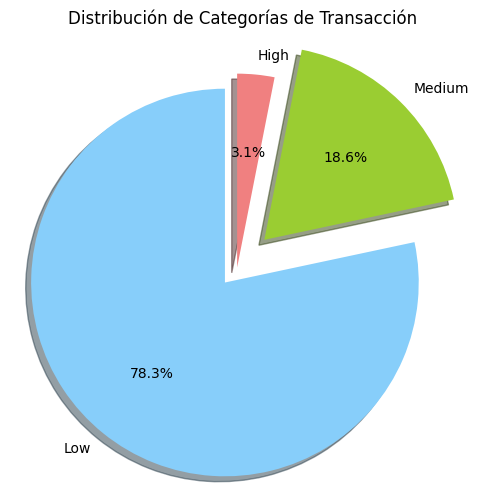

In [ ]:
# grafica para categoria de transación pie grafica

transaction_counts = data_cleaned['Transaction_Category'].value_counts()

low_count = transaction_counts['Low']
medium_count = transaction_counts['Medium']
high_count = transaction_counts['High']

labels = ['Low', 'Medium', 'High']
sizes = [low_count, medium_count, high_count]

colors = ['lightskyblue', 'yellowgreen', 'lightcoral']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, shadow=True, explode=(0.1, 0.2, 0))
plt.axis('equal')
plt.title('Distribución de Categorías de Transacción')
plt.show()

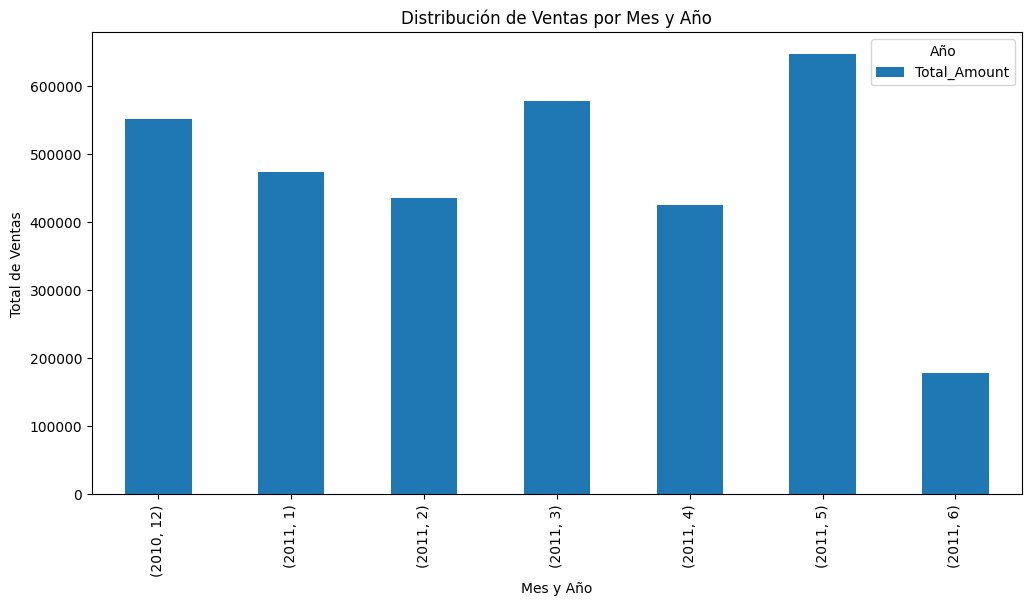

In [ ]:
#Graficar distribucion de ventas por mes y año

plt.figure(figsize=(12, 6))
data_cleaned.groupby(['Year', 'Month'])['Total_Amount'].sum().plot(kind='bar', stacked=True)
plt.title('Distribución de Ventas por Mes y Año')
plt.xlabel('Mes y Año')
plt.ylabel('Total de Ventas')
plt.legend(title='Año')
plt.show()

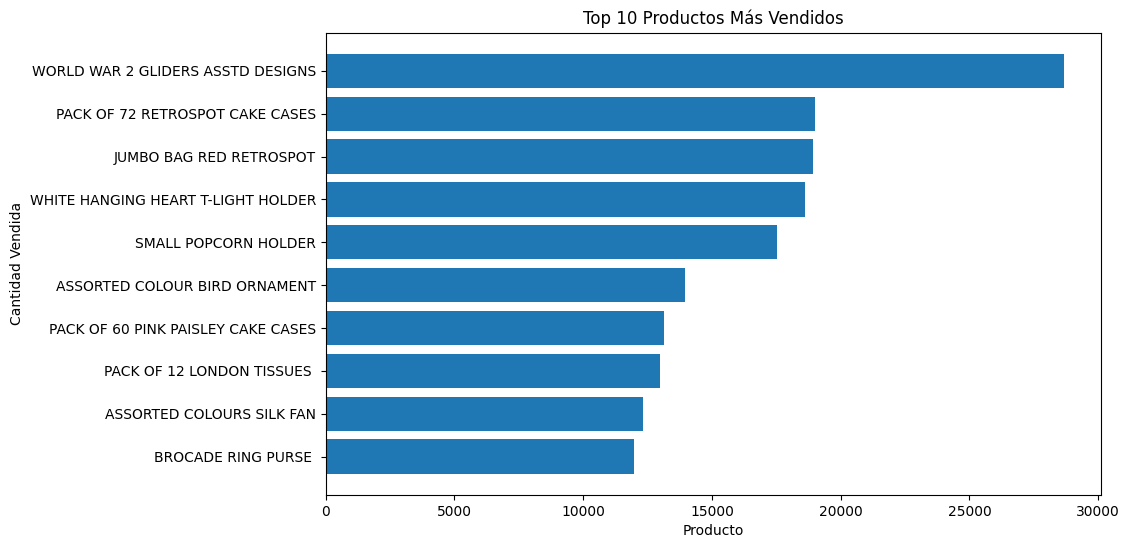

In [ ]:
#Graficar el top 10 más vendido

top_products = data_cleaned.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products = top_products.reset_index()
top_products = pd.merge(top_products, data_cleaned[['StockCode', 'Description']].drop_duplicates(), on='StockCode', how='left')

plt.figure(figsize=(10, 6))
plt.barh(top_products['Description'], top_products['Quantity'])
plt.title('Top 10 Productos Más Vendidos')
plt.xlabel('Producto')
plt.ylabel('Cantidad Vendida')
plt.gca().invert_yaxis()
plt.show()



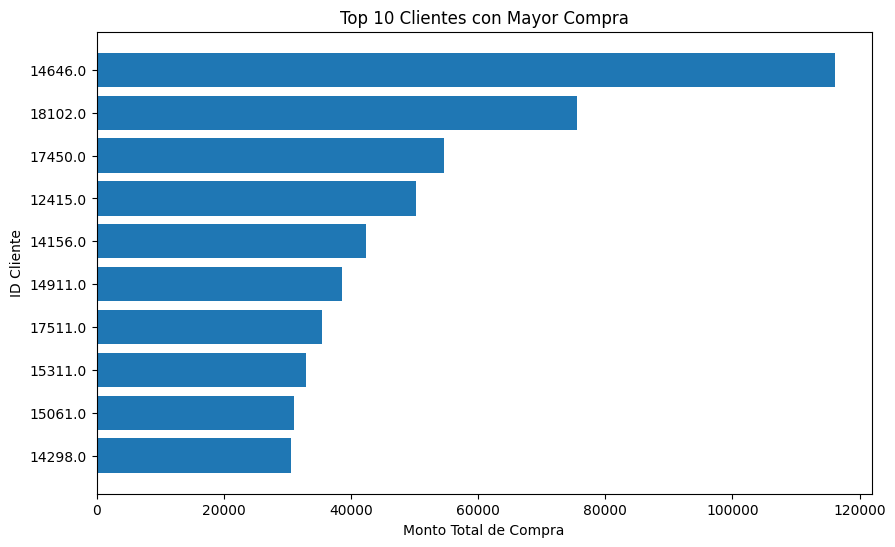

In [ ]:
#Grafica de los 10 clientes con mayores compra

top_clients = data_cleaned.groupby('CustomerID')['Total_Amount'].sum().sort_values(ascending=False).head(10)
top_clients = top_clients.reset_index()
top_clients['CustomerID'] = top_clients['CustomerID'].astype(str)
#top_clients = pd.merge(top_clients, data_cleaned[['CustomerID', 'Country']].drop_duplicates(), on='CustomerID', how='left')

plt.figure(figsize=(10, 6))
plt.barh(top_clients['CustomerID'], top_clients['Total_Amount'])
plt.title('Top 10 Clientes con Mayor Compra')
plt.xlabel('Monto Total de Compra')
plt.ylabel('ID Cliente')
plt.gca().invert_yaxis()
plt.show()
